In [1]:
import scipy.special as scs
# import scipy.misc as scm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def bernstein(n, i, t):
    return scs.comb(n, i) * t**i * (1 - t)**(n-i)

def bezier(n, t, q):
    p = np.dot([bernstein(n, i, t) for i in range(n + 1)], q)
    return p

In [3]:
q = np.array([[0, 0], [1, 1], [4, -1], [5, 0]], dtype=np.float)
P = np.array([bezier(3, t, q) for t in np.linspace(0, 1, 100)])

# list = []
# for t in np.linspace(0, 1, 100):
#     list.append(bezier(3, t, q))
# P = np.array(list)

In [4]:
P[:5]

array([[0.        , 0.        ],
       [0.03091109, 0.02939094],
       [0.06302181, 0.05698244],
       [0.09630743, 0.08281159],
       [0.1307432 , 0.1069155 ]])

In [5]:
P.T[0]

array([0.        , 0.03091109, 0.06302181, 0.09630743, 0.1307432 ,
       0.16630441, 0.2029663 , 0.24070415, 0.27949323, 0.31930879,
       0.36012611, 0.40192044, 0.44466706, 0.48834122, 0.5329182 ,
       0.57837326, 0.62468167, 0.67181869, 0.71975958, 0.76847961,
       0.81795405, 0.86815817, 0.91906722, 0.97065647, 1.02290119,
       1.07577664, 1.12925809, 1.18332081, 1.23794006, 1.2930911 ,
       1.3487492 , 1.40488963, 1.46148764, 1.51851852, 1.57595751,
       1.6337799 , 1.69196093, 1.75047588, 1.80930002, 1.8684086 ,
       1.9277769 , 1.98738018, 2.0471937 , 2.10719273, 2.16735254,
       2.22764838, 2.28805554, 2.34854926, 2.40910482, 2.46969749,
       2.53030251, 2.59089518, 2.65145074, 2.71194446, 2.77235162,
       2.83264746, 2.89280727, 2.9528063 , 3.01261982, 3.0722231 ,
       3.1315914 , 3.19069998, 3.24952412, 3.30803907, 3.3662201 ,
       3.42404249, 3.48148148, 3.53851236, 3.59511037, 3.6512508 ,
       3.7069089 , 3.76205994, 3.81667919, 3.87074191, 3.92422

In [6]:
a = [bernstein(3, i, 0.02) for i in range(3 + 1)]
a

[0.9411919999999999,
 0.057623999999999995,
 0.0011760000000000002,
 8.000000000000001e-06]

In [7]:
q

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 4., -1.],
       [ 5.,  0.]])

In [8]:
np.dot([bernstein(3, i, 0.02) for i in range(3 + 1)], q)

array([0.062368, 0.056448])

In [9]:
P[:5].T

array([[0.        , 0.03091109, 0.06302181, 0.09630743, 0.1307432 ],
       [0.        , 0.02939094, 0.05698244, 0.08281159, 0.1069155 ]])

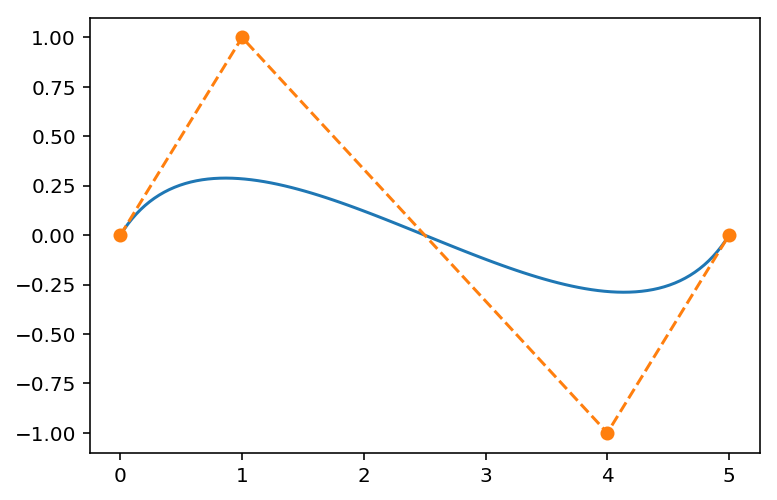

In [10]:
plt.plot(P.T[0], P.T[1])
plt.plot(q.T[0], q.T[1], '--o')
plt.show()

In [11]:
def bezier_patches(m, n, u, v, q):
    return np.dot([bernstein(n, j, v) for j in range(n + 1)],
                  np.tensordot([bernstein(m, i, u) for i in range(m + 1)], q, axes=1))

# def bezier_patches(m, n, u, v, q):
#     p = np.zeros(2)
#     for i in range(m + 1):
#         for j in range(n + 1):
#             p += bernstein(m, i, u) * bernstein(n, j, v) * q[i, j]
#     return p

In [12]:
q = np.array([
    [[0, 0], [0, 1], [0, 3], [0, 5]],
    [[1, 1], [1, 2], [1, 4], [1, 6]],
    [[2, 1], [2, 3], [2, 5], [2, 6]],
    [[4, 1], [4, 3], [4, 4], [4, 5]],
    [[5, 0], [6, 1], [6, 3], [5, 5]],
    ])

list1 = []
for u in np.linspace(0, 1, 10):
    list2 = []
    for v in np.linspace(0, 1, 10):
        list2.append(bezier_patches(4, 3, u, v, q))
    list1.append(list2)
P = np.array(list1)

In [13]:
P[:5][0]

array([[0.        , 0.        ],
       [0.        , 0.36899863],
       [0.        , 0.80384088],
       [0.        , 1.2962963 ],
       [0.        , 1.83813443],
       [0.        , 2.42112483],
       [0.        , 3.03703704],
       [0.        , 3.6776406 ],
       [0.        , 4.33470508],
       [0.        , 5.        ]])

In [14]:
[bernstein(4, i, 0.5) for i in range(4 + 1)]

[0.0625, 0.25, 0.375, 0.25, 0.0625]

In [15]:
np.tensordot([bernstein(4, i, 0.5) for i in range(4 + 1)], q, axes=1)

array([[2.3125, 0.875 ],
       [2.375 , 2.5   ],
       [2.375 , 4.25  ],
       [2.3125, 5.625 ]])

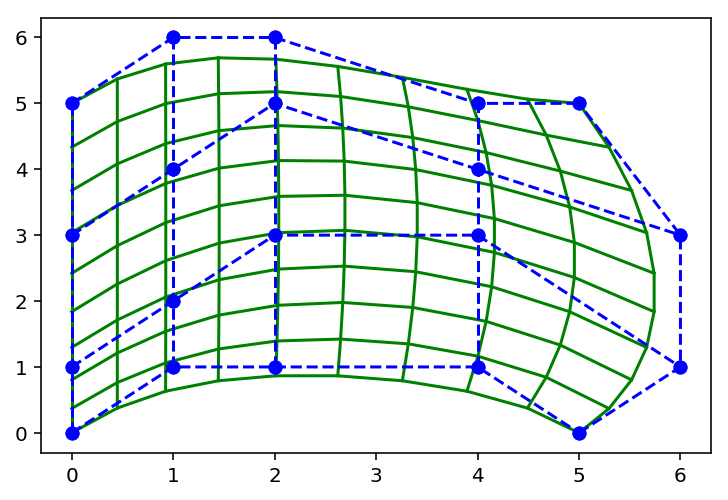

In [16]:
for i in range(10):
    plt.plot(P[i].T[0], P[i].T[1], color='g')
    P_T = np.array([P[j, i] for j in range(10)])
    plt.plot(P_T.T[0], P_T.T[1], color='g')

for i in range(5):
    plt.plot(q[i].T[0], q[i].T[1], '--o', color='b')
for j in range(4):
    q_T = np.array([q[i, j] for i in range(5)])
    plt.plot(q_T.T[0], q_T.T[1], '--o', color='b')

plt.show()

In [17]:
q = np.array([
    [[0, 0, 1], [0, 1, 2], [0, 3, 3], [0, 5, 4]],
    [[1, 1, 3], [1, 2, 4], [1, 4, 1], [1, 6, 2]],
    [[2, 1, 2], [2, 3, 1], [2, 5, 0], [2, 6, 0]],
    [[4, 1, 4], [4, 3, 1], [4, 4, 4], [4, 5, 3]],
    [[5, 0, 0], [6, 1, 4], [6, 3, 2], [5, 5, 5]],
    ])

list1 = []
for u in np.linspace(0, 1, 100):
    list2 = []
    for v in np.linspace(0, 1, 100):
        list2.append(bezier_patches(4, 3, u, v, q))
    list1.append(list2)
P = np.array(list1)

In [18]:
# P[:5][0]

In [19]:
np.tensordot([bernstein(4, i, 0.5) for i in range(4 + 1)], q, axes=1)

array([[2.3125, 0.875 , 2.5625],
       [2.375 , 2.5   , 2.    ],
       [2.375 , 4.25  , 1.5625],
       [2.3125, 5.625 , 1.8125]])

In [21]:
np.dot([bernstein(3, j, 0.5) for j in range(3 + 1)],np.tensordot([bernstein(4, i, 0.5) for i in range(4 + 1)], q, axes=1))

array([2.359375 , 3.34375  , 1.8828125])

In [22]:
[bernstein(3, j, 0.5) for j in range(3 + 1)]

[0.125, 0.375, 0.375, 0.125]